# Case Mr Heath

Neste projeto iremos desenvolver
um modelo preditivo simplificado que possa auxiliar a MR
HEALTH na otimização da gestão de estoques de suas unidades.
Utilizando dados históricos de vendas, o modelo deverá ser capaz de
prever a demanda futura, permitindo um planejamento mais
eficiente das quantidades a serem estocadas em cada unidade.

## 1 Problema de negócios



*   Necessita ter as informações
para tomada de decisão de forma mais rápida em
suas mãos e poder adotar modelos estatísticos para
gestão dos estoques de suas unidades.

*   Dados possam ser consolidados
de forma automática ao serem recebidos, para que os responsaveis possam focar em análisar estas informações e focar na tomada de ações e decisões
junto aos fornecedores e gestores das unidades, garantindo assim maior eficiencia.


### Importando as Bibliotecas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

### 2 Extraindo e entendendo melhor os dados.

In [3]:
df = pd.read_excel('/content/PEDIDO-_1__.xlsx')
df2 = pd.read_excel('/content/ITEM_PEDIDO-_2_ _.xlsx')
df3 = pd.read_excel('/content/ITENS-_3___.xlsx')

### Vamos analisar os dados da planilha "PEDIDO-_1"

In [4]:
df.head()

,Unnamed: 0,ID_PEDIDO,DATA,VALOR_TOTAL
0,0,120210601,2021-06-01,NaN
1,1,220210601,2021-06-01,NaN
2,2,320210604,2021-06-04,NaN
3,3,420210604,2021-06-04,NaN
4,5,520210604,2021-06-04,NaN


Ao analisar a planilha, identificamos a presença da coluna "índice". Como o Pandas já possui um índice nativo para os dados, essa coluna é redundante e pode ser removida para simplificar o DataFrame.

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df['DATA'] = pd.to_datetime(df['DATA'])
df.head()

,ID_PEDIDO,DATA,VALOR_TOTAL
0,120210601,2021-06-01,NaN
1,220210601,2021-06-01,NaN
2,320210604,2021-06-04,NaN
3,420210604,2021-06-04,NaN
4,520210604,2021-06-04,NaN


In [6]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID_PEDIDO[int64],Mean (sd) : 7400873701.6 (4281719825.9)min < med < max:120210601.0 < 7320210716.0 < 14720210901.0IQR (CV) : 7200000181.0 (1.7),181 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnklEQVR4nO3dP2/aQByH8d9BiMwf2UKosLF0rNSBkRfRF9uX0CGvIEOXTGxICIFwgzA2XZqxDfb5Yn/d57Of74YnubvYUtztdjOg7XpNLwC4x0PTCwjFOTc0s0ePR1xut9trXeuBn06G6pwbzmazb3EcT6s+43g87p1z34m1HToZqpk9xnE8Xa/Xr0mSnMsOPhwO0dPT03S32z2aGaG2QFdDNTOzJEnO8/n8V8Xhw1oXAy9cpiCBUCHh3a3f8/bMzRm1+Geovrdnbs6oy3u/USvfnrk5o0533fo9bs/cnP8jIY+Jnf7zFD5O6GMioaIuQY+JhNoyTX6j4Dl3XBTFIEmSfYhjIqG2SJPfKPjOnWVZlOf5l/P5/MPMqr4N/CtCbZcmv1Hwmnuz2Uyfn59H1+u1X3bsPYKGmuf5wMxi51zVRzT2wsBz7T0zKyqM890+Lc/z2Kqt22vu/X4f9C88wUJN03SQZdnX5XLZ7/f7pX9CzZp7YeCz9jzPB2mafp5MJi+9Xi8rM9Z3+/RZd+it21ewUC+Xy0MURaPVanVeLBb7suObfGHgs/Y/W+Cn1Wr1s+LYyttnDesOtnX7Cn5GHY/Hsp/aVVn72xboM9ZXk3OH0urLlMc5MS6KYhBgSWhIa0Pt8nkL5bU21C6ft1Bea0N908XzFsrjC39IIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIuOuf9h4Oh6jsg0+nU2RmlqZptN1uRx85XnVu1XX7jr+nr9/0gqmxa88jywAAAABJRU5ErkJggg=="">",0(0.0%)
2,DATA[datetime64[ns]],Min: 2021-06-01Max: 2021-09-01Duration: 92 days,81 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3dMW/aQBiH8fcgRCZBthAq2bJ0rNSBkQ/RD9uP0CGfIEOXTmxIEQLFDcIxdGmmFsgd5h8f9/zmXOvhUc7vnaW43W5ngELnox8A6SA2yFx99AN8JOdc38yuA5d3zGwbsG6z2+1eAv/PqCUbm3OuPxqNvuV5PvRdW9d1ryzLz4PB4Fen06l81q5Wq4Vz7nuKwSUbm5ld53k+nE6nL0VRrH0Wzmaz4ePj46fJZPLz7u5u8d51y+Uye3h4GD49PV2bGbGlpiiK9Xg8/u2zZrFY9M3Mbm9vvdeaWd/z5y8GAwJkiA0yrdpGT5gOk53wYtKa2E6ZDlOe8GLSmtgscDpMfcKLSZtiM7Ow6dASnvBiwoAAGWKDDLFBpnXvbCHquu6ZWe6c81mWb7fb3pkeqXEnHAu15oOB6GMry7JXVdXX+/v7brfbffcUW1VVVtf1l/V6/cPMfAcSqdBjobZ9MBB9bJvN5irLspvJZLL2uRT/e5l+8/r62j3n8zUk6FiobR8MRB/bG99L8bfL9Jj4Hgud8sFAXde5+b+amB3Yfi8mNjQn9NXE7PD2S2z4R+irybHtl9iwV9Pf650ltsAxPaqjCPhrPLbQMT2mowiEOcdvtlPG9FiOIhDgYGynbIdFUSwu/SgiRAq3HfvsjY3tsHkp3HYccug3G9thwxK57djr6Dtb6Kk19kvhtuN/+MQIMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskDn6JyCXy2Xm8w8+Pz9nZmZlWWbz+fzm0tbF9Kzqdcda+QMWuJbrfGVoXgAAAABJRU5ErkJggg=="">",0(0.0%)
3,VALOR_TOTAL[float64],1. nan,181 (100.0%),,181(100.0%)


### Data dictionary planilha PEDIDO-_1__

**ID_PEDIDO:** Numero de identificação unico do pedido

**DATA:** Dia, Mes e Ano de quando o pedido foi realizado

**VALOR_TOTAL:** O valor total do pedido

### Agora analisaremos os dados da planilha "ITEM_PEDIDO-2"

In [7]:
df2.head()

,Unnamed: 0,ID_PEDIDO,ID_ITEM,QUANTIDADE
0,0,120210601,item C,4
1,1,220210601,item A,3
2,2,320210604,item C,1
3,3,420210604,item B,4
4,4,420210604,item C,2


In [8]:
df2 = df2.drop(columns=['Unnamed: 0'])
df2.head()

,ID_PEDIDO,ID_ITEM,QUANTIDADE
0,120210601,item C,4
1,220210601,item A,3
2,320210604,item C,1
3,420210604,item B,4
4,420210604,item C,2


In [9]:
dfSummary(df2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID_PEDIDO[int64],Mean (sd) : 7675464960.0 (4263868747.9)min < med < max:120210601.0 < 7920210718.0 < 14720210901.0IQR (CV) : 7050000180.5 (1.8),181 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dT4riQBSA8Vdjq/EPEXHQnRcYmIVLDzGHnSO04Am8gTshSMRMB2PMrHoY6LbVlGXyyu+3leoW+ap86QTaFEUhQN19q/oNANd4qfoNwB/GmI6ItEouPxRF8XbuRULFXRhjOqPR6FcYhsMy63e73dYY8/tcrN6Garm7RS7scHzQCsNwOJ/P3waDQXrLwjiOg+VyOYyiqCUizxOq7e4WubzD8bnBYJCOx+M/JZZ2vnrRy1DFYneLXLfD8Vi+hioiVrtb5MIOx2Px5ymoQKhQgVChAqFCBUKFCl5f9T8jl7cxq0SoHnF9G7NKF0P1dYfWleXnHfb7/fF8Pt+5uI1ZpS9D9XmH1pHt551lWZDn+Y92u/3q4jZmlS6dqE4fNPCVxalY+kQUEVmv18PVatU9Ho+NEr+71q6aUV09aOAjm1PR9kTcbrfeft5cTN1f6W8hn09EW4TqSJlvoapPxDzPmyISGmPKLA9Pp1Pzzm/pH0KFiIgkSdLMsuzndDptNBqNm+fj97ElTdNXESn7xNpZhHqGxeni9GRx5XA4vARB0J3NZulkMtneut712EKon7A5XVyfLK71er1SF86uxxanoVrOPCIV3TCwOV24IHLDWai2M49I9TcMypwuVV8Q+cpZqLYzTxzHwWKxGEdR9N0Ys7txuco5Eec5n1HLzjzPPCfio9peTDEn4n+1DfUdcyJEeMIfShAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKV/2fqTiOg1t/8H6/D0REkiQJNptN95Hrtf5ure/bdv01ff0FPQWf2TeT1ZwAAAAASUVORK5CYII="">",0(0.0%)
2,ID_ITEM[object],1. item D2. item B3. item C4. item A,83 (28.1%)73 (24.7%)72 (24.4%)67 (22.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB3ElEQVR4nO3bQWrbYBSF0aciQjKRMAYvxovIYrsI7cYYa9CETNRBp4HYJb36pZ6zgjf4kJHR7ZZlKUj4sfYB/D/ERkxXVS9V9bT2IQ/4WJblbe0jeFx/PB5fh2E4rH3IveZ5vnZd91Nw29MPw3A4n89v4zi+r33MV2632/M0TYfL5fJUVWLbmL6qahzH99Pp9GvtY+70svYB/B0vCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGTF/159OdtQ+5x1bu5HP9PM/XaZoOtZFPd+Z5vlbVx9p38DifhRPTmfKR4gWBmJZ/Rv1c7kyz6yorqv1pcl1lRbVPLa+rNvFXDPfzgkCM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmCanfK3dw/dodspnsrc/NgjEmPIR48lGjHUVMdZVxFhXEeNPXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEWFcRY11FjA0CMdZVxLT2ZPM027Gm1lUWVfvWzLrKomr/WltXNfVGzPfypy4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YppZV7VwA/9WU+sqi6p9s0EgxrqKGC8IxPwGs1jYuZLsWQAAAAAASUVORK5CYII="">",0(0.0%)
3,QUANTIDADE[int64],1. 42. 13. 54. 35. 2,67 (22.7%)60 (20.3%)58 (19.7%)57 (19.3%)53 (18.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIklEQVR4nO3bwWkbQQCG0VEQJrlICIGLcREpNkWoG2O0h9j4ohycFvyN0LxXwRw+dpll/93tdhtQ+DH7AKxDbGTERmY3xvg1xniafZD/Pm+32/vsQ/A99ufz+ffhcDjNPsgYY2zb9rbb7f4I7jHtD4fD6eXl5f14PH7MPMj1ev15uVxOr6+vT2MMsT2g/RhjHI/Hj+fn57+zDzO+Xuk8KBcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mvsxvn7vmX2QezgD32u/bdvb5XI5jTv4vWfbtrcxxufsc/A9/BZOZmc3SsUFgcw9vEa9OhcxfV1lUbWOqesqi6q13MO6avonFxouCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSmrqssqtYyfV1lUbUOv4WTsa4i44JAZuZr1OtzMdPWVVZV65myrrKqWtPMdZVV1WJcEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhMWVdZVa1p2rrKqmo9fgsnY11FxpONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryNggkLGuIjPjyeaJtqh8XWVVta50XWVVtbYZ6yqrqkX5qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTSdZVV1drydZVV1bpsEMhYV5FxQSAjNjL/AMcxDjdHGZITAAAAAElFTkSuQmCC"">",0(0.0%)


### Data dictinary planilha "ITEM_PEDIDO-2".


**ID_PEDIDO:** Numero de identificação unico do pedido

**ID_ITEM:** Numero de identificação unico do item

**QUANTIDADE** Quantidade de item no pedido

### Veremos agora os dados da planilha "ITENS-3__"


In [10]:
df3.head()

,Unnamed: 0,0
0,item A,10
1,item B,15
2,item C,20
3,item D,25


A análise do dataset identificou colunas para itens e valores sem identificação adequada. Para facilitar a análise, renomearemos as colunas

In [11]:
df3.columns = ['ID_ITEM', 'Valor_Item']
df3.head()

,ID_ITEM,Valor_Item
0,item A,10
1,item B,15
2,item C,20
3,item D,25


In [12]:
dfSummary(df3)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID_ITEM[object],1. item A2. item B3. item C4. item D,1 (25.0%)1 (25.0%)1 (25.0%)1 (25.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABqklEQVR4nO3bQWrbYBhF0V/FhGZiYQxejBfRxXYR3o0x1qAJmaiDTkpJRzVXIT1nBd/gIiOjN63rOqDwZesD+H+Ijcw0xngeYzxtfchfvK3r+rL1ETzG7ng8ftvv94etD3nPsiy3aZq+C+5z2O33+8P5fH6Z5/l162N+d7/fv14ul8P1en0aY4jtE9iNMcY8z6+n0+nH1se843nrA3gcLwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkdmP8+pxn60P+9BFv4t/slmW5XS6Xw/iAn/Msy3IbY7xtfQeP4bNwMpMpHxUvCGT8jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjykfGlI+MDQIZUz4ynmxkrKvIWFeRsa4i409dMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjA0CGesqMp5sZKyryFhXkbGuIuNPXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iowNAhnrKjJeEMj8BCec2LkbpCRdAAAAAElFTkSuQmCC"">",0(0.0%)
2,Valor_Item[int64],1. 102. 153. 204. 25,1 (25.0%)1 (25.0%)1 (25.0%)1 (25.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABqklEQVR4nO3bQWrbYBhF0V/FhGZiYQxejBfRxXYR3o0x1qAJmaiDTkpJRzVXIT1nBd/gIiOjN63rOqDwZesD+H+Ijcw0xngeYzxtfchfvK3r+rL1ETzG7ng8ftvv94etD3nPsiy3aZq+C+5z2O33+8P5fH6Z5/l162N+d7/fv14ul8P1en0aY4jtE9iNMcY8z6+n0+nH1se843nrA3gcLwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkdmP8+pxn60P+9BFv4t/slmW5XS6Xw/iAn/Msy3IbY7xtfQeP4bNwMpMpHxUvCGT8jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjykfGlI+MDQIZUz4ynmxkrKvIWFeRsa4i409dMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjA0CGesqMp5sZKyryFhXkbGuIuNPXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iowNAhnrKjJeEMj8BCec2LkbpCRdAAAAAElFTkSuQmCC"">",0(0.0%)


### Data dictinary planilha "ITENS-3__".

**ID_ITEM:** Numero de identificação unico do item

**Valor_Item:** Valor de cada item.

Insights:



1.   Vemos o tempo de 92 dias com inicio em 2021-06-01 e final em 2021-09-01
2.  A análise da distribuição dos itens em pedidos revela similaridade entre os itens, com Item D (28,1%), Item B (24,7%), Item C (24,4%) e Item A (22,7%).
3.  A análise da quantidade de itens por pedido revela similaridade na distribuição, com 4 itens (22,7%), 1 item (20,3%), 5 itens (19,7%), 3 itens (19,3%) e 2 itens (18,0%).






A função dfSummary() agiliza a verificação de valores nulos e duplicados, economizando tempo e linhas de código.

## Após analisar os dados começaremos a analisar os dados unidos.

Após a análise inicial, uniremos os dados em um único conjunto para uma análise mais abrangente e aprofundada, buscando desvendar os insights que eles contêm.




In [13]:
df_merged = pd.merge(pd.merge(df, df2, on='ID_PEDIDO', how='inner'), df3, on='ID_ITEM', how='left')

df_merged['VALOR_TOTAL'] = df_merged['QUANTIDADE'] * df_merged['Valor_Item']

new_column_order = ['ID_PEDIDO', 'DATA', 'ID_ITEM', 'QUANTIDADE', 'Valor_Item', 'VALOR_TOTAL']
df_merged = df_merged[new_column_order]

df_merged.head()

,ID_PEDIDO,DATA,ID_ITEM,QUANTIDADE,Valor_Item,VALOR_TOTAL
0,120210601,2021-06-01,item C,4,20,80
1,220210601,2021-06-01,item A,3,10,30
2,320210604,2021-06-04,item C,1,20,20
3,420210604,2021-06-04,item B,4,15,60
4,420210604,2021-06-04,item C,2,20,40


In [14]:
dfSummary(df_merged)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID_PEDIDO[int64],Mean (sd) : 7675464960.0 (4263868747.9)min < med < max:120210601.0 < 7920210718.0 < 14720210901.0IQR (CV) : 7050000180.5 (1.8),181 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dT4riQBSA8Vdjq/EPEXHQnRcYmIVLDzGHnSO04Am8gTshSMRMB2PMrHoY6LbVlGXyyu+3leoW+ap86QTaFEUhQN19q/oNANd4qfoNwB/GmI6ItEouPxRF8XbuRULFXRhjOqPR6FcYhsMy63e73dYY8/tcrN6Garm7RS7scHzQCsNwOJ/P3waDQXrLwjiOg+VyOYyiqCUizxOq7e4WubzD8bnBYJCOx+M/JZZ2vnrRy1DFYneLXLfD8Vi+hioiVrtb5MIOx2Px5ymoQKhQgVChAqFCBUKFCl5f9T8jl7cxq0SoHnF9G7NKF0P1dYfWleXnHfb7/fF8Pt+5uI1ZpS9D9XmH1pHt551lWZDn+Y92u/3q4jZmlS6dqE4fNPCVxalY+kQUEVmv18PVatU9Ho+NEr+71q6aUV09aOAjm1PR9kTcbrfeft5cTN1f6W8hn09EW4TqSJlvoapPxDzPmyISGmPKLA9Pp1Pzzm/pH0KFiIgkSdLMsuzndDptNBqNm+fj97ElTdNXESn7xNpZhHqGxeni9GRx5XA4vARB0J3NZulkMtneut712EKon7A5XVyfLK71er1SF86uxxanoVrOPCIV3TCwOV24IHLDWai2M49I9TcMypwuVV8Q+cpZqLYzTxzHwWKxGEdR9N0Ys7txuco5Eec5n1HLzjzPPCfio9peTDEn4n+1DfUdcyJEeMIfShAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKV/2fqTiOg1t/8H6/D0REkiQJNptN95Hrtf5ure/bdv01ff0FPQWf2TeT1ZwAAAAASUVORK5CYII="">",0(0.0%)
2,DATA[datetime64[ns]],Min: 2021-06-01Max: 2021-09-01Duration: 92 days,81 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACuElEQVR4nO3csW7aUBiG4f9AiEwS2UJpYWPpWKkDYy6iF9tLaKRcQYYundiQEDLCDcKx6ZJuheQc7A9sv89+oiP0ysf2b8Xt93sDFHrn3gC6g9ggc3XuDTSVc25oZtcBS3f7/f6l6v00AbEFcM4N7+/vv8dxPPJdu16vV865H10MjtjCXMdxPHp4eHhJkmT70UVpmkZPT0+j5XJ5bWbEho9LkmQ7Ho//eC4b1rKZBuABATLEBhligwyxQYbYIENskCE2yBAbZIgNMp2eIJwwTI/LshxUvZ+262xspwzT8zyPiqL4ut1uf5qZ77iqszobmwUO083M5vP56Pn5+eb19bVf1+ba6KJiO+FY65lZ6bkmLstykCTJyneYvlqt5MN08W9jVsN3dxcTW+ixVhTFIMuyL3d3d797vV7+0XVNOgrVv41ZPd/dXUxsFnisvR1pn2ez2a/JZLLyXNeUo1D626RpGj0+Po6Xy+Un59zac68Hr4iXFJuZ+X8j9u9Iu729DVrXJKrfJsuyQZ7n36bTab/f73vdzx67Il5cbDi/3W53FUXRzWw22/peEY99iUxsOMj3ivjm4InBBAEyxAYZYoMMsUGG2CBTy9No4GiFLylarvLYQkcrTRofIUwdV7ZTRitNGR8hQG0vdUNHK2gvJghiRVEMzCx2zvksa8X9LLEJhQ6423I/S2xCoQPuttzPEtsZdOFzqP/hpS5kjl7ZeDmLKh2MjZezqNqxKxsvZ1Gpdx8QeDmLqvCAABligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmXf/82SappHPH9xsNpGZWZZl0WKxuGnbuibtVb3uvVb+ArLnigToe2fEAAAAAElFTkSuQmCC"">",0(0.0%)
3,ID_ITEM[object],1. item D2. item B3. item C4. item A,83 (28.1%)73 (24.7%)72 (24.4%)67 (22.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB3ElEQVR4nO3bQWrbYBSF0aciQjKRMAYvxovIYrsI7cYYa9CETNRBp4HYJb36pZ6zgjf4kJHR7ZZlKUj4sfYB/D/ERkxXVS9V9bT2IQ/4WJblbe0jeFx/PB5fh2E4rH3IveZ5vnZd91Nw29MPw3A4n89v4zi+r33MV2632/M0TYfL5fJUVWLbmL6qahzH99Pp9GvtY+70svYB/B0vCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGTF/159OdtQ+5x1bu5HP9PM/XaZoOtZFPd+Z5vlbVx9p38DifhRPTmfKR4gWBmJZ/Rv1c7kyz6yorqv1pcl1lRbVPLa+rNvFXDPfzgkCM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmCanfK3dw/dodspnsrc/NgjEmPIR48lGjHUVMdZVxFhXEeNPXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEWFcRY11FjA0CMdZVxLT2ZPM027Gm1lUWVfvWzLrKomr/WltXNfVGzPfypy4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YppZV7VwA/9WU+sqi6p9s0EgxrqKGC8IxPwGs1jYuZLsWQAAAAAASUVORK5CYII="">",0(0.0%)
4,QUANTIDADE[int64],1. 42. 13. 54. 35. 2,67 (22.7%)60 (20.3%)58 (19.7%)57 (19.3%)53 (18.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIklEQVR4nO3bwWkbQQCG0VEQJrlICIGLcREpNkWoG2O0h9j4ohycFvyN0LxXwRw

### Definindo as variaveis numericas.

As variáveis numéricas são a chave para desvendar os segredos dos dados.

Ao analisá-las, poderemos identificar padrões, tendências e insights valiosos que nos auxiliarão na tomada de decisões mais assertivas.

In [15]:
features_numericas = df_merged.select_dtypes('number').columns.tolist()

print(f'Contem {len(features_numericas)} características numéricas. Eles são: ')
print(features_numericas)

Contem 4 características numéricas. Eles são: 
['ID_PEDIDO', 'QUANTIDADE', 'Valor_Item', 'VALOR_TOTAL']


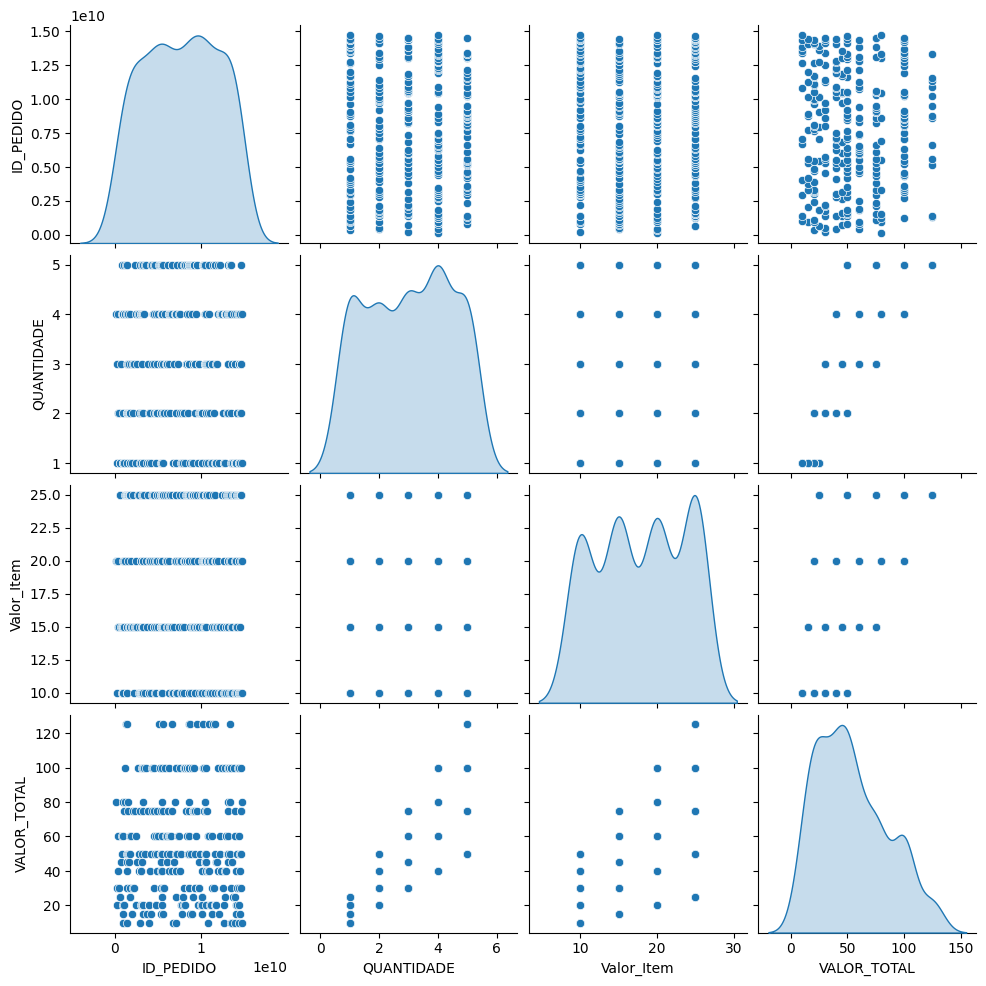

In [16]:
sns.pairplot(df_merged[features_numericas], kind="scatter", diag_kind="kde")

1. Relacionamento Positivo (QUANTIDADE vs. VALOR_TOTAL): Confirma que, conforme a quantidade aumenta, o valor total também aumenta.

2. Valores Discretos (Valor_Item): Indica que os itens têm preços fixos, sem grande variação.

3. Distribuição Uniforme (ID_PEDIDO): Os IDs dos pedidos são distribuídos uniformemente.

In [17]:
def check_outliers(data, features):
    outlier_indexes = {}
    outlier_counts = {}
    total_outliers = 0

    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_indexes[feature] = outliers.index.tolist()
        outlier_counts[feature] = len(outliers)
        total_outliers += len(outliers)

    return outlier_indexes, outlier_counts, total_outliers

outlier_analysis_features = ['ID_PEDIDO', 'QUANTIDADE', 'Valor_Item', 'VALOR_TOTAL']

outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df_merged, features=outlier_analysis_features)

print(f"Outlier Indexes: {outlier_indexes}")
print(f"Outlier Counts: {outlier_counts}")
print(f"Total Outliers: {total_outliers}")

Outlier Indexes: {'ID_PEDIDO': [], 'QUANTIDADE': [], 'Valor_Item': [], 'VALOR_TOTAL': []}
Outlier Counts: {'ID_PEDIDO': 0, 'QUANTIDADE': 0, 'Valor_Item': 0, 'VALOR_TOTAL': 0}
Total Outliers: 0


Insights:
1.  Não haver outliers é um bom sinal de que os dados estão bem comportados e não possuem valores anômalos que poderiam distorcer análises ou modelos preditivos.

2.  Os dados são consistentes e não apresentam valores extremos que necessitariam de tratamento especial, como remoção ou transformação.

3. A ausência de outliers pode simplificar a análise estatística e a modelagem preditiva, pois não será necessário aplicar técnicas de manipulação de outliers.

4. Confirma a robustez dos processos de coleta e registro dos dados.



### Matriz de correlação

In [18]:
corr_matrix = df_merged.corr(numeric_only=True)

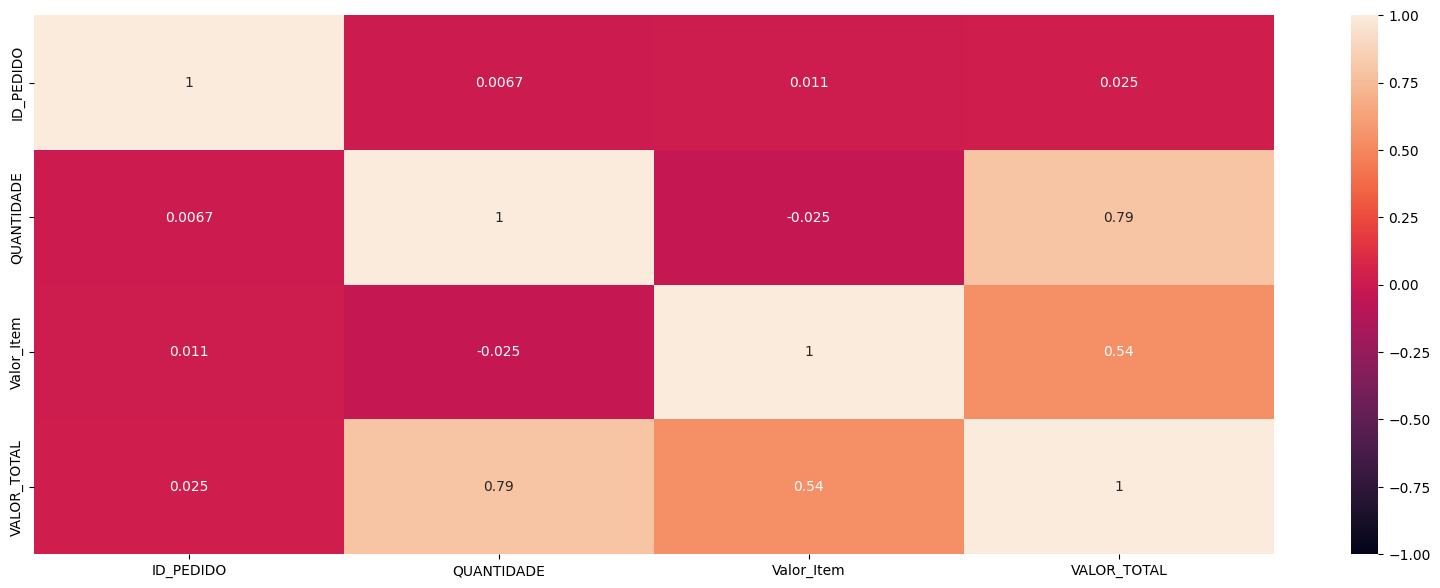

In [19]:
plt.figure(figsize=(20, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

### Analisando a Matriz de Correção:

Na matriz de correlação da imagem, podemos observar:

1. QUANTIDADE e VALOR_TOTAL (0.79):

     *   Alta correlação positiva. Quando a quantidade vendida aumenta, o valor total tende a aumentar também. Isso é esperado, pois o valor total é calculado com base na quantidade.
2. Valor_Item e VALOR_TOTAL (0.54):

     *   Correlação positiva moderada. Produtos com maior valor tendem a contribuir mais para o valor total, mas a quantidade também influencia bastante.
3. QUANTIDADE e Valor_Item (-0.025):

    *    Correlação muito baixa e negativa. Indica que a quantidade e o valor dos itens não têm uma relação linear significativa.
ID_PEDIDO e outras variáveis:

A correlação entre ID_PEDIDO e outras variáveis é muito baixa (próxima de 0). Isso faz sentido, pois ID_PEDIDO é um identificador único para cada pedido e não deve ter correlação linear com outras variáveis numéricas.


### Analisar as vendas por mês

In [20]:
df_merged['Year'] = df_merged['DATA'].dt.year
df_merged['Month'] = df_merged['DATA'].dt.month

grouped = df_merged.groupby(['Year', 'Month'])

vendas_por_mes = grouped['VALOR_TOTAL'].agg(['sum', 'mean', 'count']).reset_index()

print(vendas_por_mes)

   Year  Month   sum       mean  count
0  2021      6  4165  50.792683     82
1  2021      7  6525  56.739130    115
2  2021      8  5130  54.000000     95
3  2021      9   140  46.666667      3


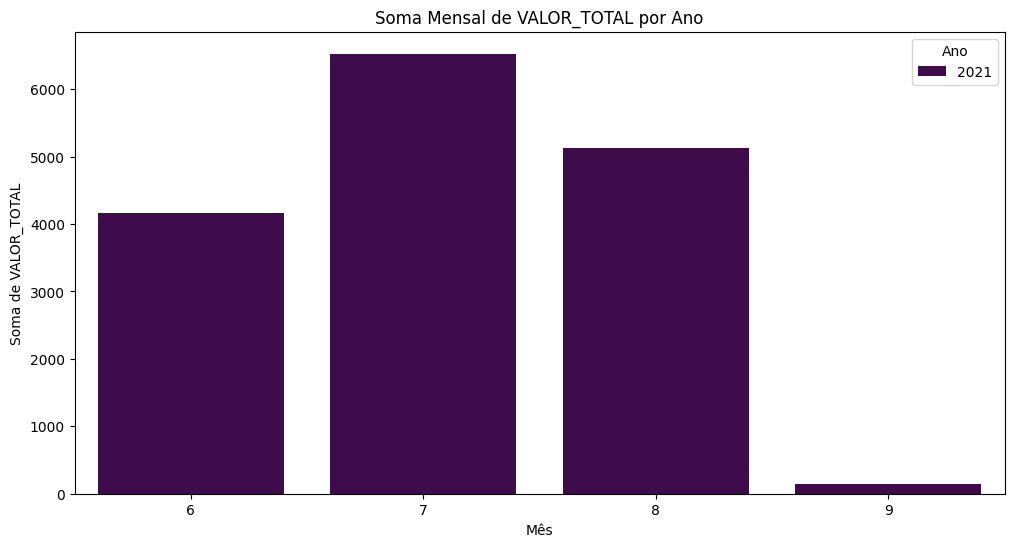

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_mes, x='Month', y='sum', hue='Year', palette='viridis')

plt.title('Soma Mensal de VALOR_TOTAL por Ano')
plt.xlabel('Mês')
plt.ylabel('Soma de VALOR_TOTAL')
plt.legend(title='Ano')
plt.show()

Insights:
1. Julho apresenta o melhor desempenho em termos de total de vendas e número de pedidos.
2. As médias de vendas por pedido são relativamente estáveis, o que sugere consistência no valor dos pedidos.

## Conslusão EDA

1. Os itens A, B, C e D apresentam pouca diferença em relação ao total dos pedidos. Isso sugere que todos esses itens são bem aceitos pelos clientes, indicando uma diversidade de preferências. A similaridade nas vendas pode ser um indicativo de que a MR. HEALTH conseguiu equilibrar seu cardápio para atender diferentes gostos.

2. A maioria dos pedidos contém 4 itens, seguidos por pedidos com apenas 1 item. Há uma correlação direta entre a quantidade de itens no pedido e o valor final do pedido. Isso sugere que os clientes que compram mais itens aumentam significativamente o valor total das vendas. Criar campanhas promocionais ou pacotes que incentivem os clientes a adicionar mais itens aos seus pedidos. Oferecer descontos progressivos ou promoções do tipo "compre 3, leve 4" pode ser eficaz para aumentar o número de itens por pedido.

3. Julho registrou os melhores resultados de vendas. Este pico pode estar relacionado a campanhas de marketing específicas ou eventos regionais, como festivais de inverno, que são populares no Rio Grande do Sul. Analisar detalhadamente as campanhas de marketing realizadas em julho para identificar as estratégias de sucesso. Considerar replicar essas estratégias em outros meses ou durante eventos regionais semelhantes para maximizar as vendas.

4. Os dados de setembro são limitados, com vendas registradas apenas em um dia. Com apenas um dia de dados, é impraticável tirar conclusões precisas sobre o desempenho de vendas em setembro.

5. Os insights mostram que a MR. HEALTH possui uma aceitação diversificada de seus itens principais, mas há espaço para melhorar as vendas por pedido.